In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
df=pd.read_csv('/content/car data.csv')

In [6]:
df.head(11)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
le=LabelEncoder()
df['Car_Name']=le.fit_transform(df['Car_Name'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Selling_type']=le.fit_transform(df['Selling_type'])
df['Transmission']=le.fit_transform(df['Transmission'])

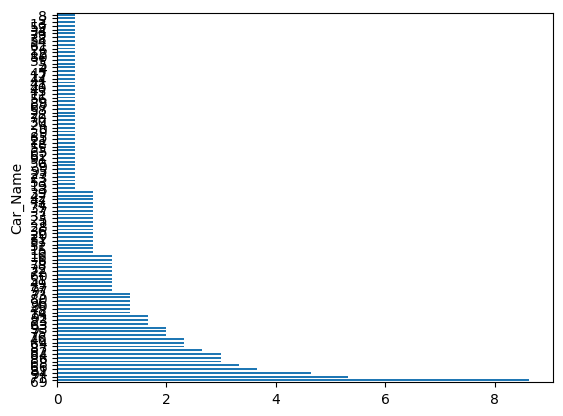

In [9]:
(df['Car_Name'].value_counts(normalize=True)*100).plot(kind='barh').figsize=(50,50)

'0=Petrol 1=Diesel 2=CNG'

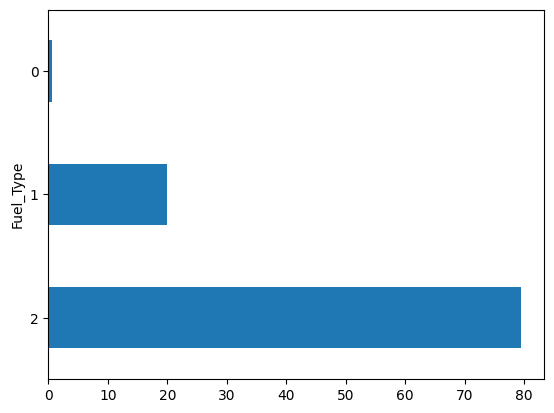

In [10]:
(df['Fuel_Type'].value_counts(normalize=True)*100).plot(kind='barh')
'''0=Petrol 1=Diesel 2=CNG'''

'1=Individual 2=Dealer 3=Trustmark Dealer'

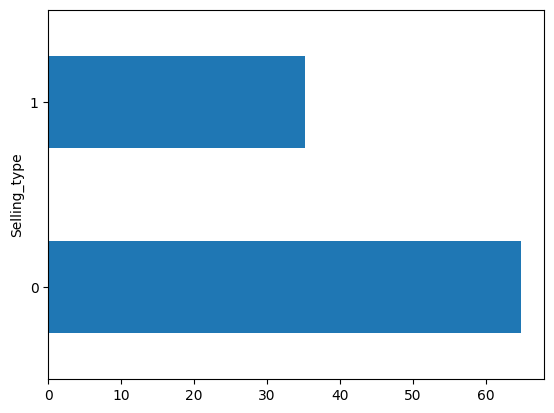

In [11]:
(df['Selling_type'].value_counts(normalize=True)*100).plot(kind='barh')
'''1=Individual 2=Dealer 3=Trustmark Dealer'''

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Car_Name,301.0,62.571429,25.573535,0.00,47.0,69.0,82.0,97.0
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301.0,1.787375,0.425801,0.00,2.0,2.0,2.0,2.0
Selling_type,301.0,0.352159,0.478439,0.00,0.0,0.0,1.0,1.0
Transmission,301.0,0.867110,0.340021,0.00,1.0,1.0,1.0,1.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [13]:
df.drop_duplicates(inplace=True)

<Axes: >

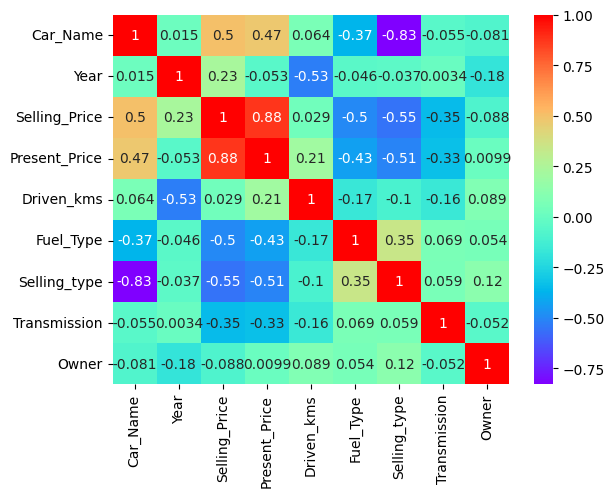

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

In [15]:
df=df.drop('Car_Name',axis=1)

<Axes: >

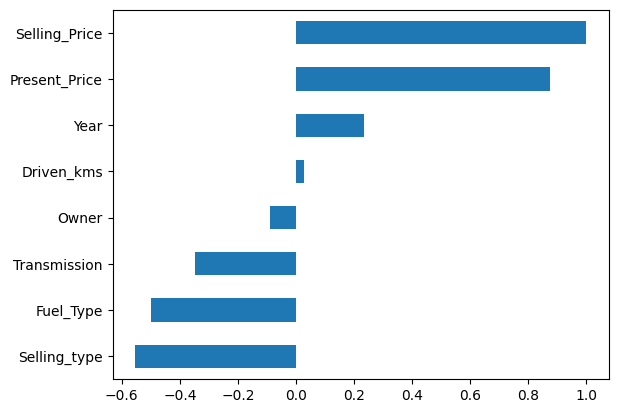

In [16]:
df.corr()['Selling_Price'].sort_values(ascending=True).plot(kind='barh')

2.536521826497541


<ipython-input-17-223205d40285>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Selling_Price'])


<Axes: xlabel='Selling_Price', ylabel='Density'>

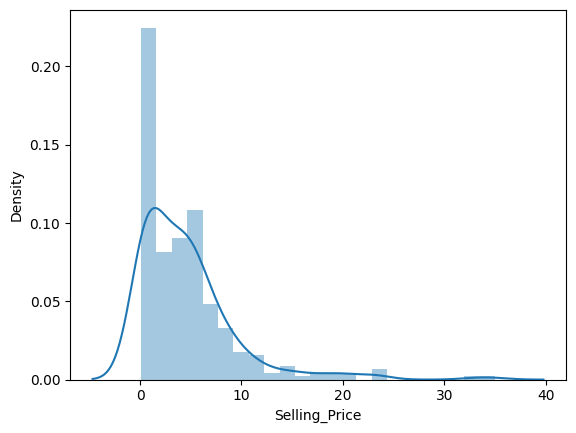

In [17]:
print(df['Selling_Price'].skew())
sns.distplot(df['Selling_Price'])

4.18925490207532


<ipython-input-18-d7c7134ed57a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Present_Price'])


<Axes: xlabel='Present_Price', ylabel='Density'>

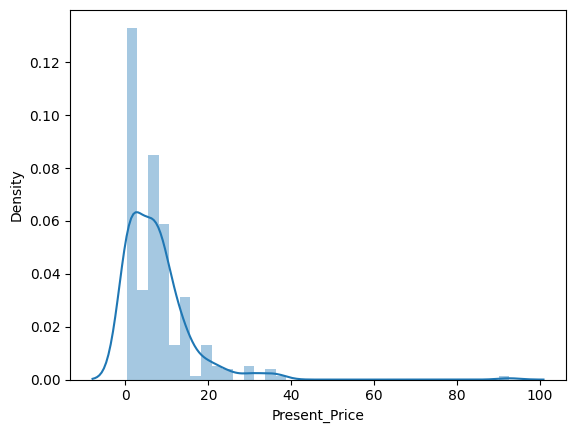

In [18]:
print(df['Present_Price'].skew())
sns.distplot(df['Present_Price'])

In [19]:
u_l=df['Selling_Price'].quantile(0.95)
l_l=df['Selling_Price'].quantile(0.05)
df['Selling_Price']=np.where(df['Selling_Price']>u_l,u_l,np.where(df['Selling_Price']<l_l,l_l,df['Selling_Price']))

<ipython-input-20-881ed5755e54>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Selling_Price'])


<Axes: xlabel='Selling_Price', ylabel='Density'>

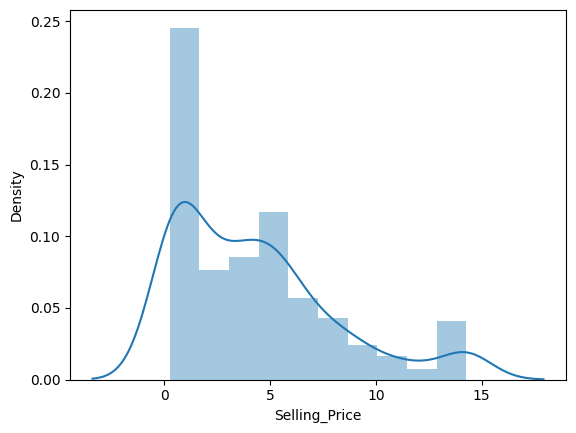

In [20]:
sns.distplot(df['Selling_Price'])

<ipython-input-21-6f153693f9eb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Present_Price'])


<Axes: xlabel='Present_Price', ylabel='Density'>

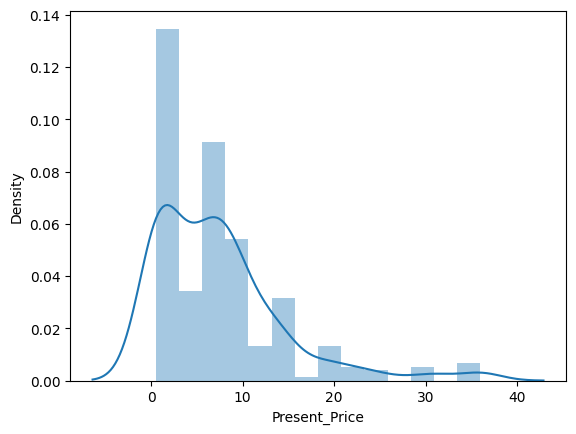

In [21]:
u_l=df['Present_Price'].quantile(0.99)
l_l=df['Present_Price'].quantile(0.01)
df['Present_Price']=np.where(df['Present_Price']>u_l,u_l,np.where(df['Present_Price']<l_l,l_l,df['Present_Price']))
sns.distplot(df['Present_Price'])

6.418134387971488


<ipython-input-22-2c5718416a1a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Driven_kms'])


<Axes: xlabel='Driven_kms', ylabel='Density'>

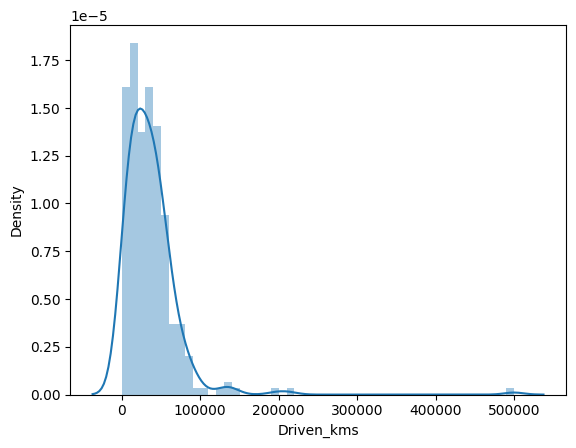

In [22]:
print(df['Driven_kms'].skew())
sns.distplot(df['Driven_kms'])

<ipython-input-23-b255219c3e71>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Driven_kms'])


<Axes: xlabel='Driven_kms', ylabel='Density'>

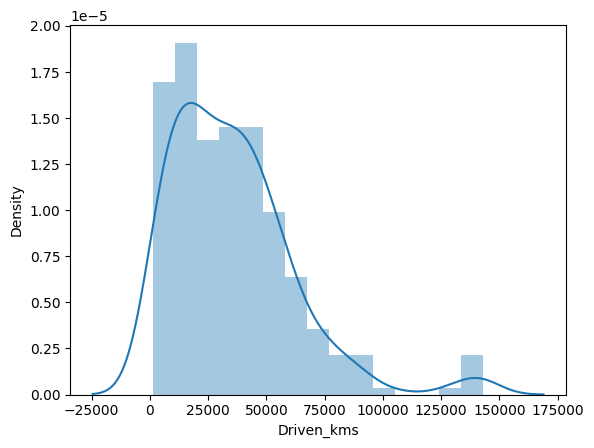

In [23]:
u_l=df['Driven_kms'].quantile(0.99)
l_l=df['Driven_kms'].quantile(0.01)
df['Driven_kms']=np.where(df['Driven_kms']>u_l,u_l,np.where(df['Driven_kms']<l_l,l_l,df['Driven_kms']))
sns.distplot(df['Driven_kms'])

In [24]:
df.shape

(299, 8)

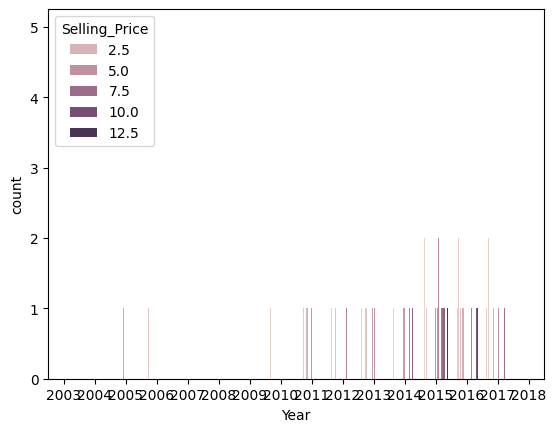

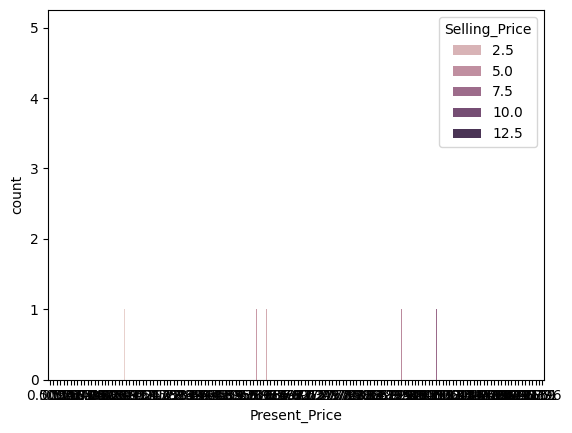

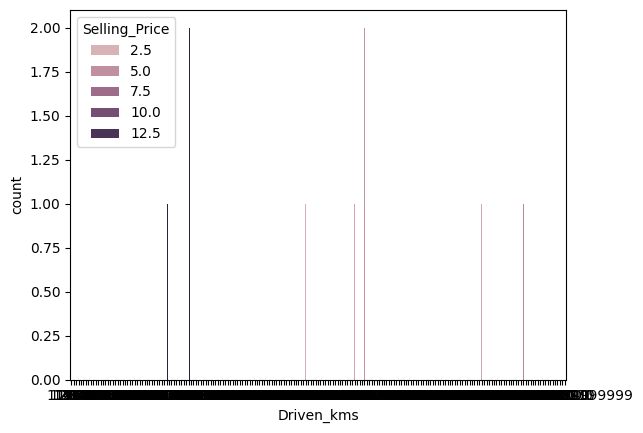

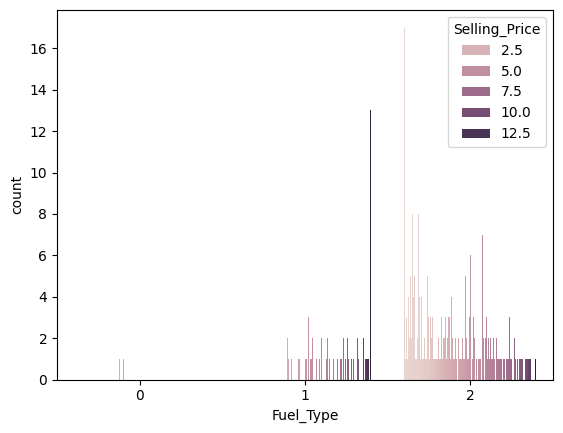

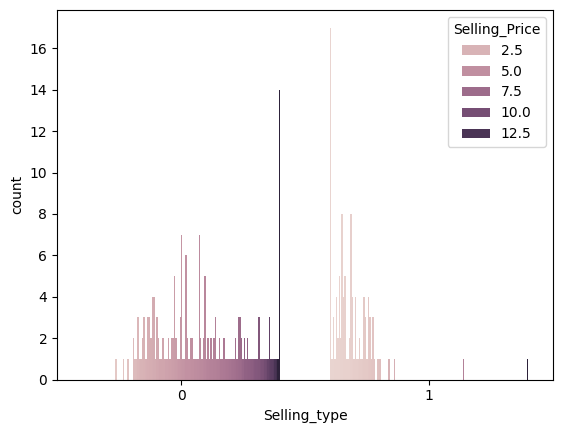

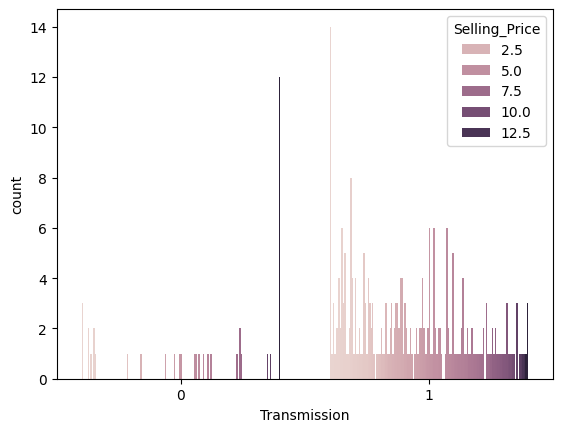

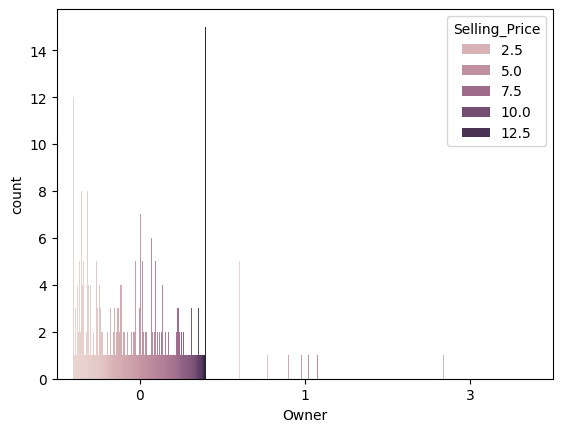

In [25]:
features=["Present_Price","Driven_kms","Fuel_Type","Selling_type","Transmission","Owner","Year", 'Selling_Price'] # Add 'Selling_Price' to the features list
for i,predictor in enumerate(df.drop('Selling_Price',axis=1)):
  plt.figure(i)
  sns.countplot(x=predictor,hue='Selling_Price',data=df[features])

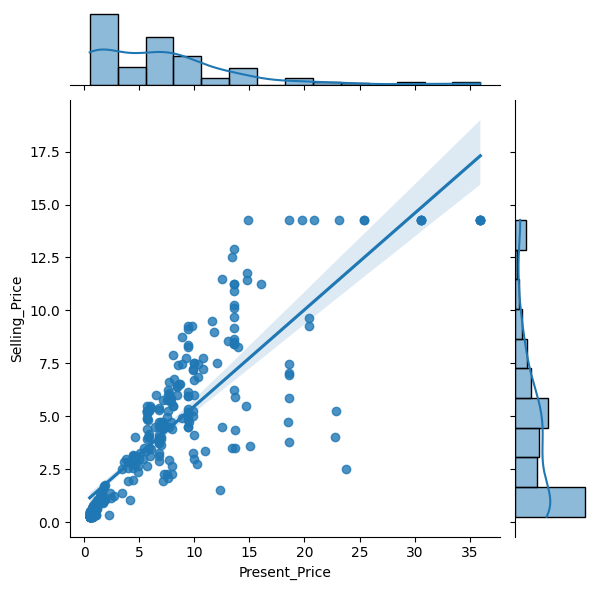

In [26]:
sns.jointplot(x="Present_Price",y="Selling_Price",data=df,kind="reg")

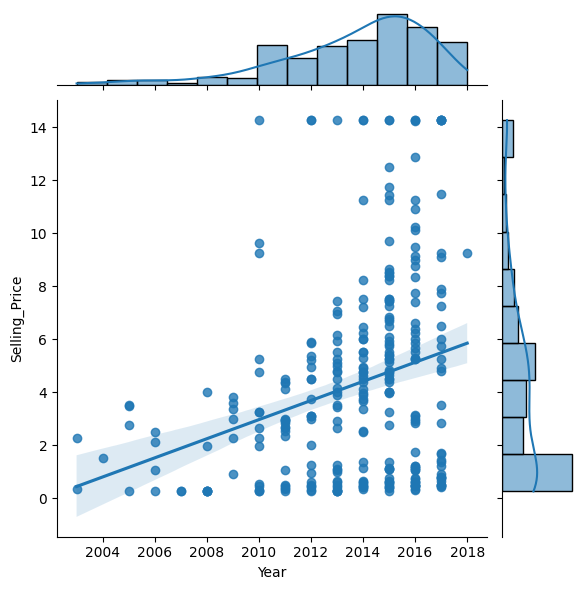

In [27]:
sns.jointplot(x="Year",y="Selling_Price",data=df,kind="reg")

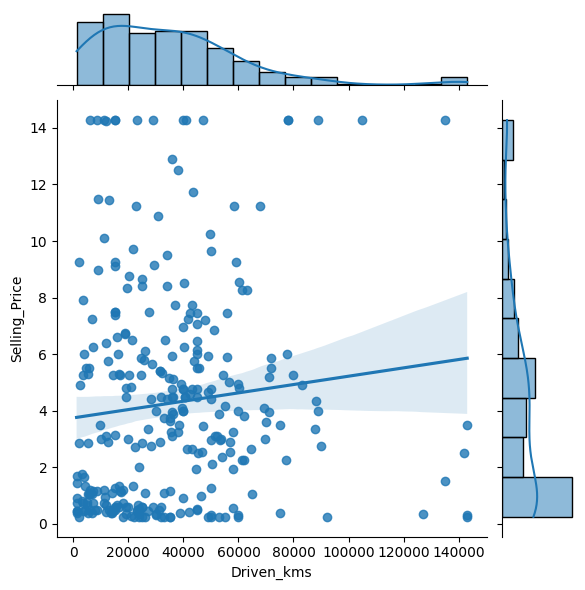

In [28]:
sns.jointplot(x="Driven_kms",y="Selling_Price",data=df,kind="reg")

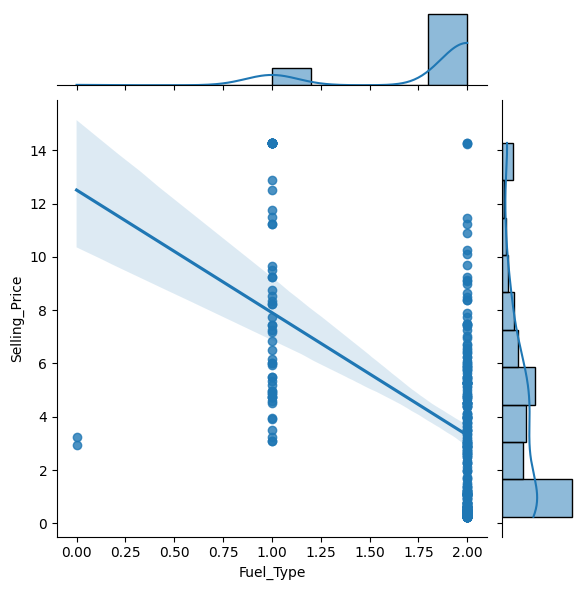

In [29]:
sns.jointplot(x="Fuel_Type",y="Selling_Price",data=df,kind="reg")

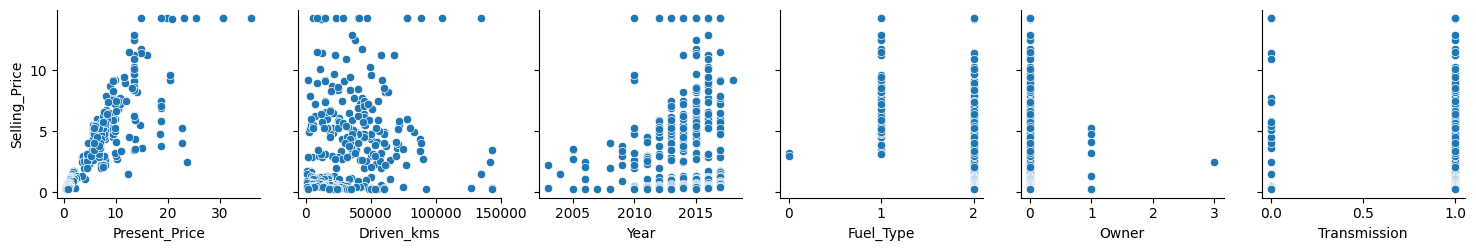

In [30]:
sns.pairplot(df,x_vars=['Present_Price','Driven_kms','Year','Fuel_Type','Owner','Transmission'],y_vars='Selling_Price',kind='scatter',diag_kind='kde')

In [31]:
df.size

2392

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

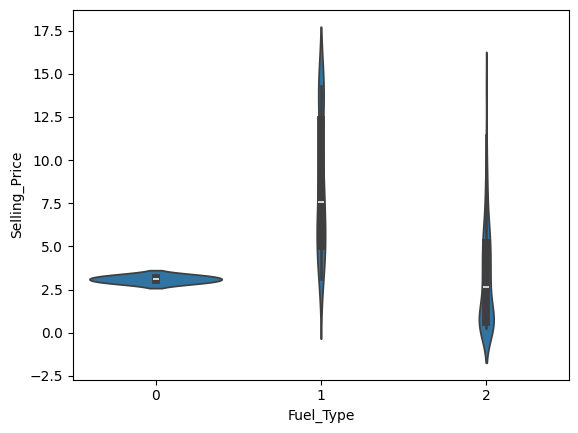

In [32]:
sns.violinplot(x='Fuel_Type',y='Selling_Price',data=df)

<Axes: xlabel='Owner', ylabel='Selling_Price'>

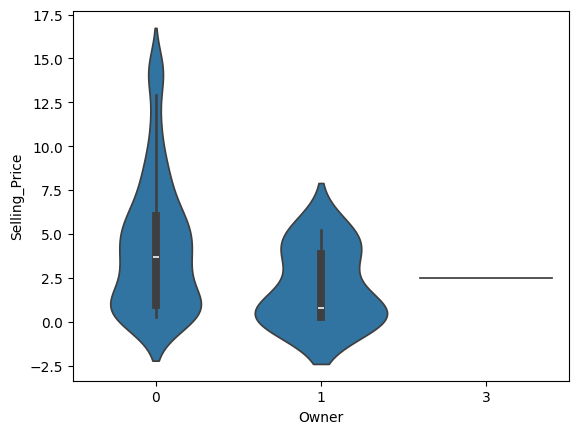

In [33]:
sns.violinplot(x='Owner',y='Selling_Price',data=df)

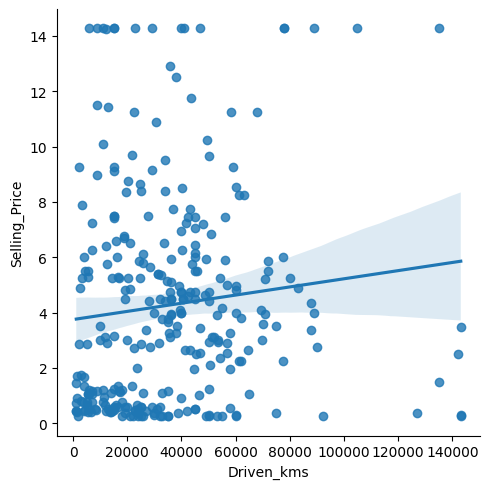

In [34]:
sns.lmplot(x='Driven_kms',y='Selling_Price',data=df)

In [35]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)

In [36]:
x=df[['Present_Price','Year']]
y=df['Selling_Price']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [38]:
lm=LinearRegression()

In [39]:
lm.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=lm.predict(x_test)
print(y_pred)

[ 7.29882877  6.14675447  1.89848046  5.5610248  10.46168143  4.1113313
  9.14658039  2.35450988  7.06379739  0.23567377  9.31920775 -0.25260961
 -0.2478093   2.23939434  4.18804436  4.97538703  2.08569254  2.48891855
 19.25169159  1.68237464  1.68237464  2.57994064  5.28269874  0.07344386
  4.79288337  7.8075697   7.64426727  1.98479414  4.72549524  5.08081005
  3.72250622  4.70176938  4.79288337  2.2532439   2.91587041  5.4122152
  1.98479414 -0.95843892  2.30650678  9.72705027  7.61537352  7.74036536
  2.23930245  3.29906812  1.67277402 -1.28495186  8.1628845   3.99603197
  3.82792924  0.45802     1.30161819  0.84213666  9.47245007  8.1628845
  7.45225489  5.2105103   3.47261443  3.38630076  8.37880654  9.5018952 ]


In [41]:
lm.coef_

array([0.48003096, 0.35531481])

<Axes: xlabel='Selling_Price'>

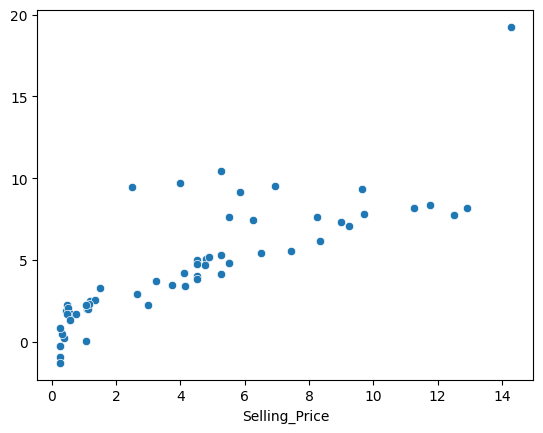

In [42]:
sns.scatterplot(x=y_test,y=y_pred)

In [43]:
residuals=y_test-y_pred
print(residuals)

283    1.691171
267    2.203246
166   -1.448480
9      1.888975
78    -5.211681
280    1.138669
95    -3.296580
111   -1.204510
5      2.186203
175    0.144326
99     0.330792
197    0.502610
186    0.497809
156   -1.759394
58    -0.088044
61    -0.475387
149   -1.575693
110   -1.288919
64    -4.976692
142   -1.082375
157   -1.202375
106   -1.229941
249   -0.032699
47     0.976556
43     0.707117
277    1.892430
282    0.605733
118   -0.884794
215   -0.225495
238   -0.280810
18    -0.472506
241    0.048231
34     0.707117
25     0.746756
46    -0.265870
7      1.087785
115   -0.874794
196    1.208439
113   -1.156507
94    -5.727050
76    -2.115374
83     4.759635
120   -1.189302
77    -1.799068
131   -0.922774
199    1.534952
212    3.087115
290    0.503968
221    0.672071
180   -0.158020
146   -0.751618
188   -0.592137
85    -6.972450
250    4.737115
279   -1.202255
74    -0.310510
246    0.277386
26     0.763699
211    3.371193
60    -2.551895
Name: Selling_Price, dtype: float64


<ipython-input-44-e54ecdecbd4d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,bins=20)


<Axes: xlabel='Selling_Price', ylabel='Density'>

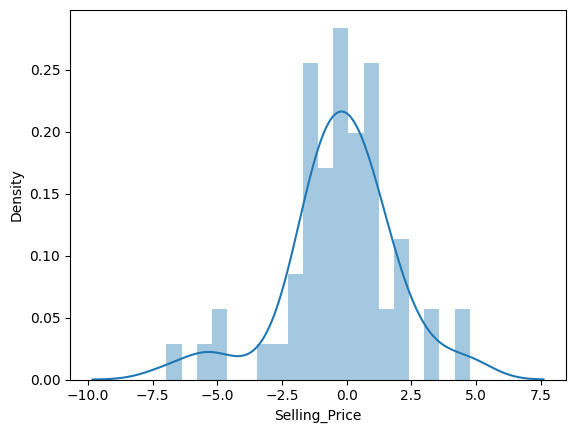

In [44]:
sns.distplot(residuals,bins=20)

In [45]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)

2.154265336755729


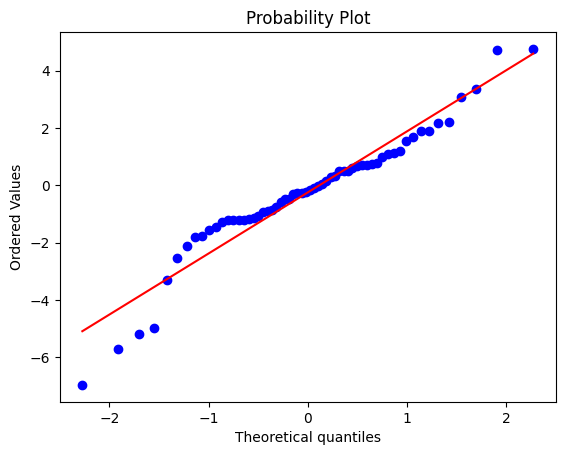

In [46]:
import pylab
import scipy.stats as sts
sts.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(lm,x,y,cv=10)

array([ 7.32831580e-01,  8.74130079e-01,  5.19661089e-01,  7.86740430e-01,
       -1.13359979e+02, -6.41830276e+02,  7.23520667e-01,  6.36546831e-01,
        6.59179863e-01,  6.65226644e-01])

In [52]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(lm,
                 {
                     'fit_intercept':[True,False],
                 },cv=5)

In [53]:
clf.fit(x,y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [54]:
clf.cv_results_

{'mean_fit_time': array([0.00334749, 0.00224156]),
 'std_fit_time': array([0.00139271, 0.00025308]),
 'mean_score_time': array([0.00211601, 0.00172019]),
 'std_score_time': array([3.25305788e-04, 8.43950583e-05]),
 'param_fit_intercept': masked_array(data=[True, False],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True}, {'fit_intercept': False}],
 'split0_test_score': array([0.85140562, 0.71155105]),
 'split1_test_score': array([0.66812622, 0.49431808]),
 'split2_test_score': array([-121.11025978,  -44.83749343]),
 'split3_test_score': array([0.76420143, 0.70999681]),
 'split4_test_score': array([0.60749233, 0.22540108]),
 'mean_test_score': array([-23.64380684,  -8.53924528]),
 'std_test_score': array([48.73329735, 18.15000178]),
 'rank_test_score': array([2, 1], dtype=int32)}

In [55]:
a=pd.DataFrame(clf.cv_results_)

In [56]:
print(a[['param_fit_intercept','mean_test_score']])

  param_fit_intercept  mean_test_score
0                True       -23.643807
1               False        -8.539245


In [59]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(lm,
                 {
                     'fit_intercept':[True,False],
                 },cv=5,n_iter=10,return_train_score=False)

In [60]:
rs.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False]})

In [62]:
b=pd.DataFrame(rs.cv_results_)
print(b)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002953      0.000546         0.001957        0.000144   
1       0.002446      0.000195         0.001911        0.000098   

  param_fit_intercept                    params  split0_test_score  \
0                True   {'fit_intercept': True}           0.851406   
1               False  {'fit_intercept': False}           0.711551   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.668126        -121.110260           0.764201           0.607492   
1           0.494318         -44.837493           0.709997           0.225401   

   mean_test_score  std_test_score  rank_test_score  
0       -23.643807       48.733297                2  
1        -8.539245       18.150002                1  


In [63]:
print(b[['mean_test_score','param_fit_intercept']])

   mean_test_score param_fit_intercept
0       -23.643807                True
1        -8.539245               False
